In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import STL

### ACF for whitenoise using statmodel

In [89]:
num_timesteps = 300  # Data
np.random.seed(0)  

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


In [90]:
acf_=acf(x=df["y"],nlags=20)
acf_

array([ 1.        , -0.02964689,  0.0517005 ,  0.05675462,  0.00436303,
        0.03528042, -0.00266454,  0.16528553,  0.11264096,  0.00461414,
        0.0512451 , -0.01728878,  0.01791833,  0.06893252,  0.07320845,
        0.07403495, -0.0241931 , -0.04691654,  0.03300885,  0.07272857,
        0.05298582])

Text(0, 0.5, 'Autocorrelation')

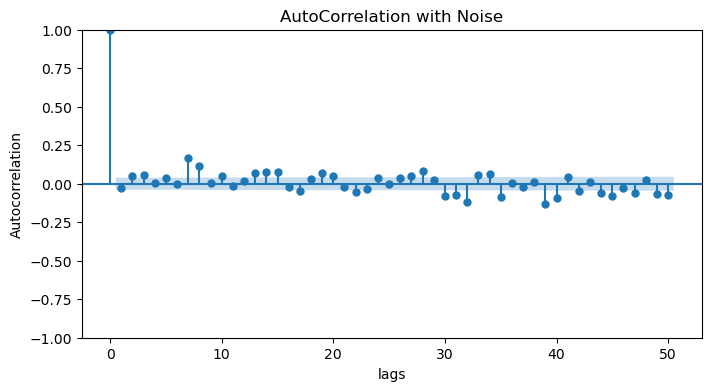

In [91]:
fig,ax=plt.subplots(figsize=[8,4])
plot_acf(x=df["y"],
        lags=50,
        ax=ax,
        alpha=0.5);
ax.set_title("AutoCorrelation with Noise")
ax.set_xlabel("lags")
ax.set_ylabel("Autocorrelation")

In [92]:
# the auto correlation at other lags are not significient expect 0

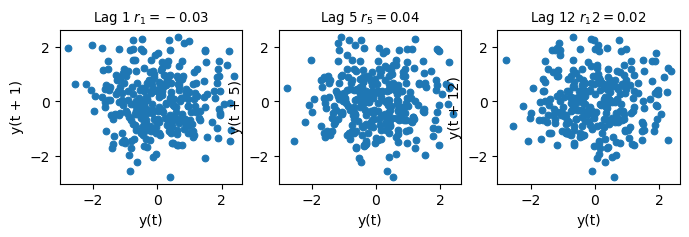

In [93]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[8,2])
with sns.plotting_context ("paper"):
    pd.plotting.lag_plot(df["y"],lag=1,ax=ax[0])
    ax[0].set_title(f"Lag 1 $r_1={acf_[1]:.2f}$")
    ax[0].ticklabel_format(style="sci",scilimits=(0,0))
    
    pd.plotting.lag_plot(df["y"],lag=5,ax=ax[1])
    ax[1].set_title(f"Lag 5 $r_5={acf_[5]:.2f}$")
    ax[1].ticklabel_format(style="sci",scilimits=(0,0))
    
    pd.plotting.lag_plot(df["y"],lag=12,ax=ax[2])
    ax[2].set_title(f"Lag 12 $r_12={acf_[12]:.2f}$")
    ax[2].ticklabel_format(style="sci",scilimits=(0,0))

## Time series with Trend and seasonality.

In [94]:
data=pd.read_csv("example_retail_sales.csv",parse_dates=["ds"],index_col=["ds"])

Text(0.5, 0, 'Time')

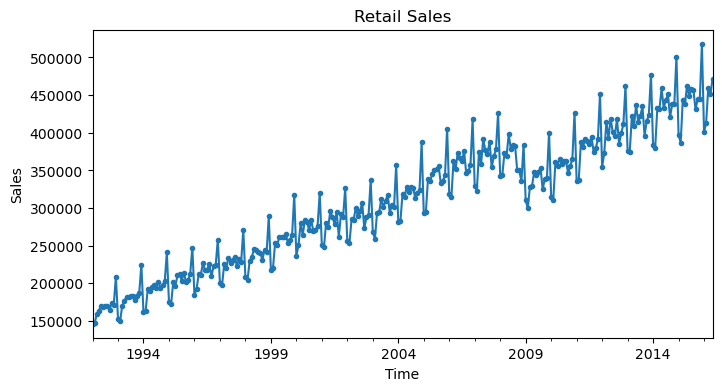

In [95]:
ax=data.plot(y="y",marker=".",figsize=[8,4],legend=None)
ax.set_title("Retail Sales")
ax.set_ylabel("Sales")
ax.set_xlabel("Time")

In [96]:
#Computing acf
acf_=acf(data["y"],nlags=36)

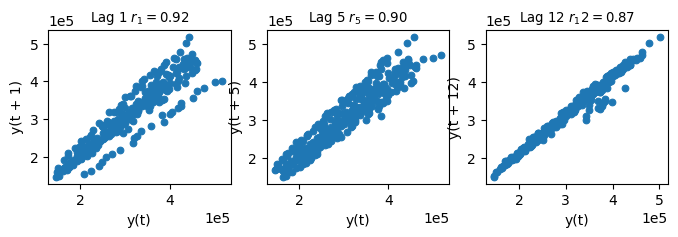

In [97]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[8,2])
with sns.plotting_context ("paper"):
    pd.plotting.lag_plot(data["y"],lag=1,ax=ax[0])
    ax[0].set_title(f"Lag 1 $r_1={acf_[1]:.2f}$")
    ax[0].ticklabel_format(style="sci",scilimits=(0,0))
    
    pd.plotting.lag_plot(data["y"],lag=5,ax=ax[1])
    ax[1].set_title(f"Lag 5 $r_5={acf_[5]:.2f}$")
    ax[1].ticklabel_format(style="sci",scilimits=(0,0))
    
    pd.plotting.lag_plot(data["y"],lag=12,ax=ax[2])
    ax[2].set_title(f"Lag 12 $r_12={acf_[12]:.2f}$")
    ax[2].ticklabel_format(style="sci",scilimits=(0,0))

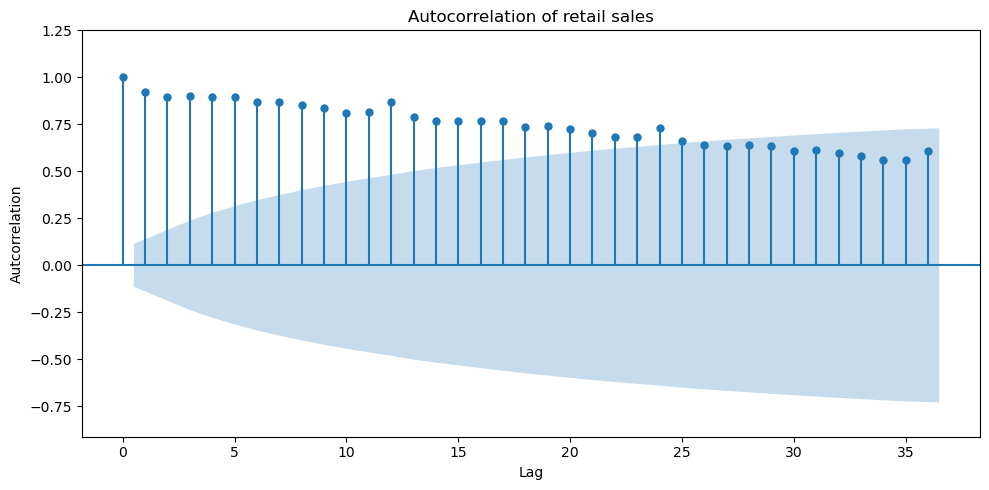

In [98]:
# ploting acf
fig,ax=plt.subplots(figsize=[10,5])
plot_acf(
    x=data["y"],
    lags=36,
    ax=ax ,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Autocorrelation of retail sales")
ax.set_ylabel("Autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

## Observations
1. The autocorrelation decays slowely because of strong Trend
2.Higher peaks are there at the lags of 12 that means there is seasonality with lag 12

## Auto correlation after detrending the orginal data

In [101]:
frac=0.1
y=data["y"]
x=np.arange(0,len(y))
res=lowess(endog=y,exog=x,frac=frac)
data['Lowess']=res[:, 1]

Text(0.5, 0, 'Time')

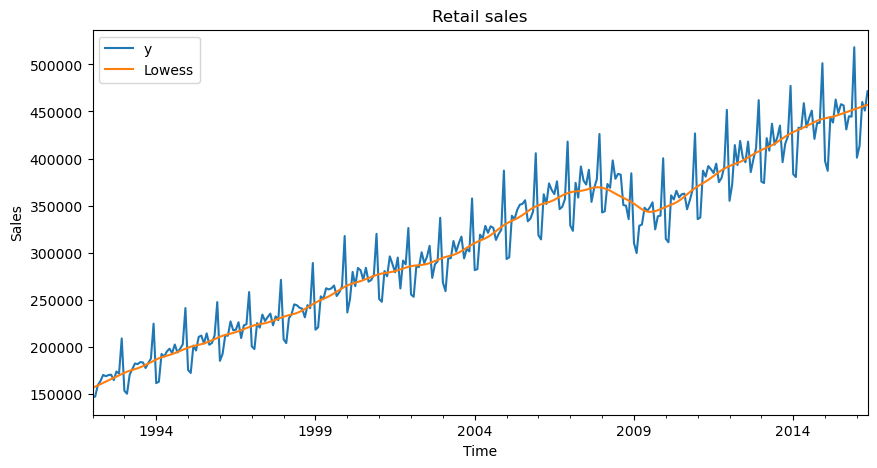

In [102]:
ax = data.plot(figsize=(10, 5))
ax.set_title("Retail sales")
ax.set_ylabel("Sales")
ax.set_xlabel("Time")

Text(0.5, 0, 'Time')

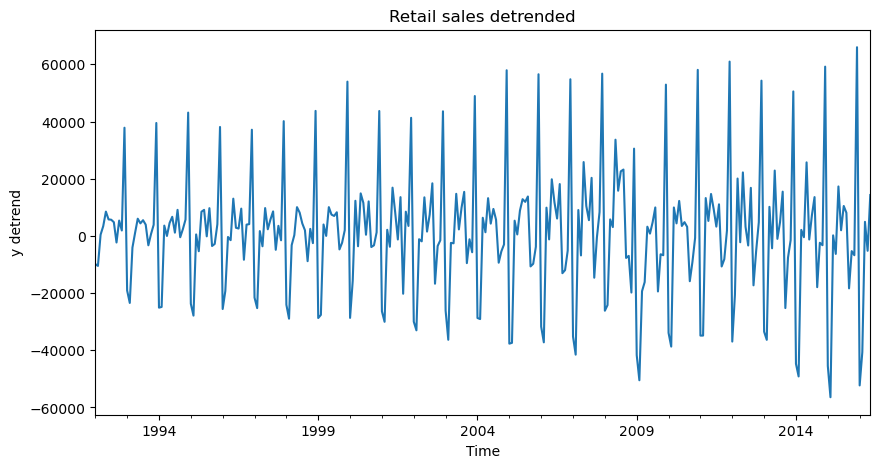

In [104]:
data["y_detrend"] = data["y"] - data["Lowess"]
ax = data["y_detrend"].plot(figsize=(10, 5))
ax.set_title("Retail sales detrended")
ax.set_ylabel("y detrend")
ax.set_xlabel("Time")

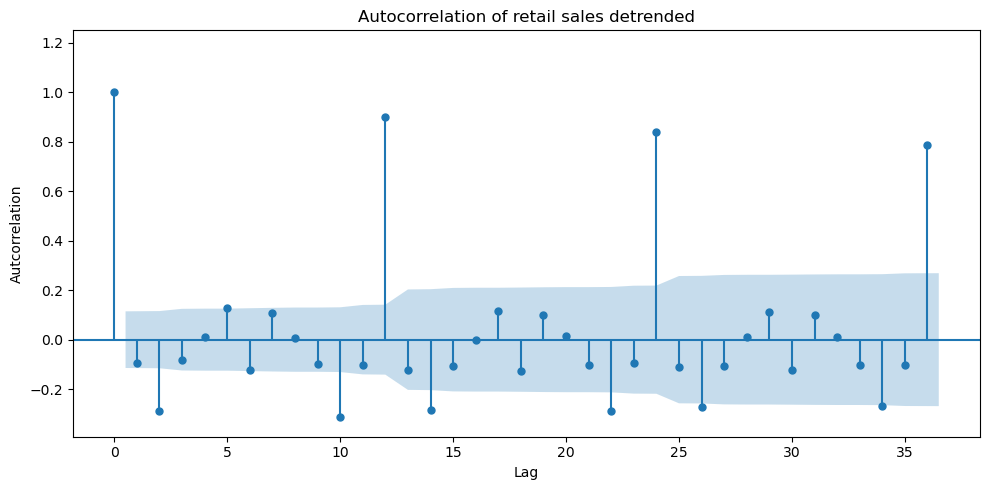

In [105]:
# ploting acf
fig,ax=plt.subplots(figsize=[10,5])
plot_acf(
    x=data["y_detrend"],
    lags=36,
    ax=ax ,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Autocorrelation of retail sales detrended")
ax.set_ylabel("Autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

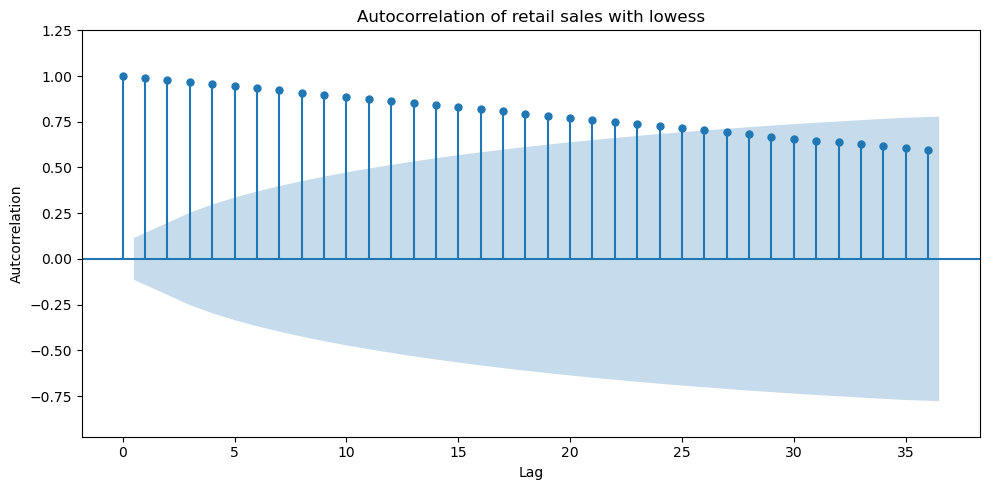

In [106]:
# ploting acf
fig,ax=plt.subplots(figsize=[10,5])
plot_acf(
    x=data["Lowess"],
    lags=36,
    ax=ax ,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Autocorrelation of retail sales with lowess")
ax.set_ylabel("Autcorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()